In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [126]:
from astropy.coordinates import SkyCoord
from hips.utils import WCSGeometry
from hips import HipsSurveyProperties, HipsTile, HipsTileMeta, SimpleTilePainter

In [144]:
geometry = WCSGeometry.create_simple(
     skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
     width=2000, height=1000, fov="5 deg",
     coordsys='galactic', projection='AIT'
)

In [145]:
url = 'http://alasky.u-strasbg.fr/Fermi/Color/properties'
hips_survey = HipsSurveyProperties.fetch(url)

In [146]:
painter = SimpleTilePainter(geometry, hips_survey, 'jpg')
painter.run()

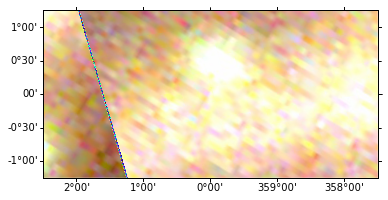

In [147]:
from astropy.visualization.mpl_normalize import simple_norm

ax = plt.subplot(projection=geometry.wcs)
norm = simple_norm(painter.image, 'asinh')
data = painter.image.astype(np.uint8)
ax.imshow(data, origin='lower')

### Prining tile index values

In [148]:
print(data[100, 200])
print(painter.image[100, 200])

[162 138  99]
[ 162.50860621  138.47418138   99.50860621]


### Prining tile corner values

In [149]:
print(painter.tile_indices)
print(painter.tiles[0].meta.skycoord_corners)
print(painter.tiles[1].meta.skycoord_corners)

[450 451]
<SkyCoord (ICRS): (ra, dec) in deg
    [( 264.375, -24.62431835), ( 258.75 , -30.        ),
     ( 264.375, -35.68533471), ( 270.   , -30.        )]>
<SkyCoord (ICRS): (ra, dec) in deg
    [( 270.   , -19.47122063), ( 264.375, -24.62431835),
     ( 270.   , -30.        ), ( 275.625, -24.62431835)]>


In [133]:
url = 'http://alasky.u-strasbg.fr/2MASS/Color/properties'
hips_survey = HipsSurveyProperties.fetch(url)

In [134]:
painter = SimpleTilePainter(geometry, hips_survey, 'jpg')
painter.run()

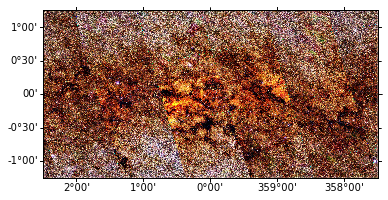

In [135]:
from astropy.visualization.mpl_normalize import simple_norm

ax = plt.subplot(projection=geometry.wcs)
norm = simple_norm(painter.image, 'asinh')
data = painter.image.astype(np.uint8)
ax.imshow(data, origin='lower')

In [143]:
print(painter.tile_indices)
print(painter.tiles[0].meta.skycoord_corners)
print(painter.tiles[1].meta.skycoord_corners)

[28807 28813 28815 28818 28819 28822 28824 28825 28826 28827 28828 28829
 28830 28831 28837 28848 28849 28852 28853 28855 28872 28873 28874 28875
 28896 28898]
<SkyCoord (ICRS): (ra, dec) in deg
    [( 265.78125 , -31.38816646), ( 265.078125, -32.08995126),
     ( 265.78125 , -32.7971683 ), ( 266.484375, -32.08995126)]>
<SkyCoord (ICRS): (ra, dec) in deg
    [( 265.078125, -30.69158768), ( 264.375   , -31.38816646),
     ( 265.078125, -32.08995126), ( 265.78125 , -31.38816646)]>
